# COVID-19 Natural Language Processing
This Jupyter notebook provides some example code that can be used to apply some NLP tools to help make sense of publicly available scientific articles on COVID-19.  The data used in this example is available as of writing here: [Kaggle CORD-19 Research Challenge](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge).

This notebook is written in Python, and was run in an Anaconda environment for Python 3.6.  If you would like to run this code on your own, you can follow the installation guide in the code repository for the [Duke Natural Language Processing Winter School](https://github.com/duke-mlss/Duke-NLP-WS-2020), which also includes significant examples on using modern deep learning tools for text analysis.  This goes much beyond what was covered in this +Data Science lecture.

For those that want to learn more about methodology, consider our Coursera course, [Introduction to Machine Learning](https://www.coursera.org/learn/machine-learning-duke) in addition to the upcoming +Data Science lectures.

As a disclaimer, this code is set up for teaching purposes rather than research purposes.  Some shortcuts are used that reduce computational time that slightly reduce predictive ability.

Author: David Carlson   
Date: 7/2/2020

## Loading in data and a brief descriptions

In [1]:
# This block of code loads in the relevant libraries
import numpy as np # Standard numerical library
import pandas as pd # To load in data structures
import matplotlib.pyplot as plt # For plotting

In [2]:
# This line points to the appropriate metadata file, which needs to be downloaded (see the above link)
data=pd.read_csv('~/Documents/covid_archive/metadata.csv')

In [3]:
# We want to visualize the data a bit to understand what's going on in this data structure
data.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636.0,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967.0,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972.0,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871.0,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888.0,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


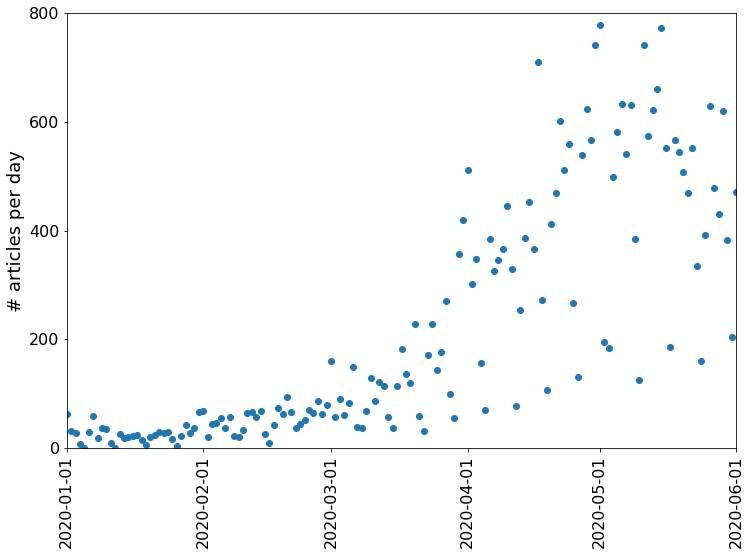

In [4]:
# This block of code extracts publishing dates (many of which are missing or imprecise),
# checks for proper formatting, and counts total article per day in 2020.
# Many documents don't follow the proper format and are ignored.
# As a further caveat, these dates were automatically extracted, so we expect a minority of the dates
# to be incorrect due to varying formats of the published articles.
dates=data['publish_time'].to_numpy()
saved_dates=[]
for date in dates:
    if type(date)==str:
        if date[0:4]=='2020':
            saved_dates.append(date)
ud,cnts=np.unique(saved_dates,return_counts=True)
fig=plt.figure(figsize=[12,8])
plt.plot_date(ud[1:],cnts[1:],xdate=True)
plt.xticks(['2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01'],rotation=90,fontsize=16)
plt.yticks([0,200,400,600,800],fontsize=16)
plt.axis(['2020-01-01','2020-06-01',0,800])
plt.ylabel('# articles per day', fontsize=18)
fig.savefig('publishing_date.pdf',transparent=True,bbox_inches="tight")

In [5]:
# We extract the most important peices of information from the loaded data file
titles=data['title'] # This is a list of titles, and their associated indicies
X=data['abstract'].dropna() # This is a list of abstracts and their associated indices
# Note that the "dropna()" command removes non-existant abstracts (i.e., documents
# where the automatic procedures couldn't capture the abstract)

# Next we concatenate the title and abstract together
for i in X.keys():
    try:
        X[i]=titles[i]+'. '+X[i]
    except:
        X[i]=np.NaN
# We drop anything that was missing a title but not an abstract
X=X.dropna()

### What does an example document look like?

In [6]:
# Pick a number (most numbers work; some are removed by the .dropna() and will throw an error)
index=100
print(X[index])

Transcript-level annotation of Affymetrix probesets improves the interpretation of gene expression data. BACKGROUND: The wide use of Affymetrix microarray in broadened fields of biological research has made the probeset annotation an important issue. Standard Affymetrix probeset annotation is at gene level, i.e. a probeset is precisely linked to a gene, and probeset intensity is interpreted as gene expression. The increased knowledge that one gene may have multiple transcript variants clearly brings up the necessity of updating this gene-level annotation to a refined transcript-level. RESULTS: Through performing rigorous alignments of the Affymetrix probe sequences against a comprehensive pool of currently available transcript sequences, and further linking the probesets to the International Protein Index, we generated transcript-level or protein-level annotation tables for two popular Affymetrix expression arrays, Mouse Genome 430A 2.0 Array and Human Genome U133A Array. Application o

## Word Counting
Below we use a slight modification to the word counting approach shown in the lecture.  It is essentially the word counting module, but the counts are weighted by the "Inverse Document Frequency." Basically, extremely common words are downweighted and specific, rarer words are upweighted.


Note, there are several well-developed packages for natural language processing now.  Here, I have chosen to use the excellent [scikit-learn](https://scikit-learn.org/stable/index.html) package due to its widespread use in machine learning and its straightforward inclusion in a wide variety of statistical models.  Compared to some other packages, its NLP tools are not as developed (e.g., no word embeddings or RNNs as of writing), but it has more than enough for our usage.

In [7]:
# sklearn has tools built in to facilitate text analysis
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# tf is "term frequency"\
n_features=20000
tfidf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                            max_features=n_features,
                            stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(X)

In [8]:
# What does this do to our document?
index=100
print(X[index])
print(tfidf_vectorizer.transform([X[index]]))

Transcript-level annotation of Affymetrix probesets improves the interpretation of gene expression data. BACKGROUND: The wide use of Affymetrix microarray in broadened fields of biological research has made the probeset annotation an important issue. Standard Affymetrix probeset annotation is at gene level, i.e. a probeset is precisely linked to a gene, and probeset intensity is interpreted as gene expression. The increased knowledge that one gene may have multiple transcript variants clearly brings up the necessity of updating this gene-level annotation to a refined transcript-level. RESULTS: Through performing rigorous alignments of the Affymetrix probe sequences against a comprehensive pool of currently available transcript sequences, and further linking the probesets to the International Protein Index, we generated transcript-level or protein-level annotation tables for two popular Affymetrix expression arrays, Mouse Genome 430A 2.0 Array and Human Genome U133A Array. Application o

In [9]:
# What is the learned dictionary?
print(tfidf_vectorizer.vocabulary_)

cal': 13051, 'sarbecovirus': 16325, 'síntomas': 17956, 'nivel': 12572, 'mayor': 11387, 'covid19': 4937, 'dashboard': 5285, 'dashboards': 5286, 'mandible': 11251, 'documento': 6037, 'española': 6958, 'cirugía': 3999, 'pgt': 13856, 'cvt': 5163, 'chatbots': 3822, 'dnn': 6025, 'issuing': 10294, 'dfa': 5678, 'prosthetics': 14818, 'tylophorine': 18880, 'drilling': 6150, 'ema': 6528, 'crm1': 5011, 'hepaticojejunostomy': 8777, 'dissections': 5937, 'nse': 12751, 'nsp8': 12769, 'civic': 4017, 'cleansing': 4069, 'erp': 6920, 'pheic': 13896, 'arteriovenous': 2214, 'msv': 12065, 'zhongnan': 19928, 'quantile': 15110, 'psychotherapy': 14943, 'hypercoagulable': 9156, 'nitrous': 12570, '075': 85, 'resuming': 15876, 'colostomy': 4291, 'hiatus': 8844, 'pga': 13851, 'pvc': 15039, 'nsp15': 12760, 'nendou': 12378, 'collate': 4255, 'mep': 11538, 'wit': 19786, 'qoe': 15079, 'diverted': 5998, 'awaited': 2552, 'ssl': 17298, 'estimators': 6988, 'locking': 10982, 'strokes': 17551, 'videoconferencing': 19451, 'clo

## Learn the latent "topic" representation
There are many topic models that are common.  Here, we use one of the simplest widely used one, which is based on non-negative matrix factorization.  Latent Dirichlet Allocation (LDA) is a famous algorithm for topic modeling that we could have done instead (typically, outcomes are similar).

In [45]:
# This block of code fits a non-negative matrix factorization to the weighted word counts, which maps each document to its topic weights
from sklearn import decomposition
n_components=100 # number of topics
nmf = decomposition.NMF(n_components=n_components, random_state=1,
            alpha=.1, l1_ratio=1).fit(tfidf[np.arange(0,tfidf.shape[0],4)]) 
# this picks every 4 document to learn the representation.  It's a crude way to decrease computational time.

In [46]:
# helper function for visualization.
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " {},".format([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        message +="\b"
        print(message)
    print()

In [47]:
print("\nTopics in NMF model (Euclidean norm observation model):")
n_top_words=10
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)


Topics in NMF model (Euclidean norm observation model):
Topic #0:  ['patients', 'characteristics', 'treated', 'retrospective', 'therapy', 'included', 'underwent', 'hospitalized', 'undergoing', 'median']
Topic #1:  ['virus', 'replication', 'hepatitis', 'particles', 'rsv', 'ebola', 'syncytial', 'infectious', 'encephalitis', 'entry']
Topic #2:  ['19', 'covid', '2020', 'march', '2019', 'confirmed', 'cov', 'deaths', 'april', 'wuhan']
Topic #3:  ['sars', 'cov', 'spike', 'syndrome', '2003', 'caused', 'igg', 'outbreak', 'covs', 'ace2']
Topic #4:  ['health', 'global', 'mental', 'countries', 'services', 'world', 'international', 'related', 'systems', 'national']
Topic #5:  ['respiratory', 'tract', 'rsv', 'syncytial', 'infants', 'lower', 'illness', 'upper', 'detected', 'nasal']
Topic #6:  ['care', 'intensive', 'management', 'units', 'critical', 'primary', 'palliative', 'unit', 'long', 'providers']
Topic #7:  ['infection', 'infected', 'rates', 'hcv', 'susceptible', 'observed', 'following', 'zikv'

In [48]:
# Because we trained on a subset, we now want to transform all the documents:
topic_weights=nmf.transform(tfidf)

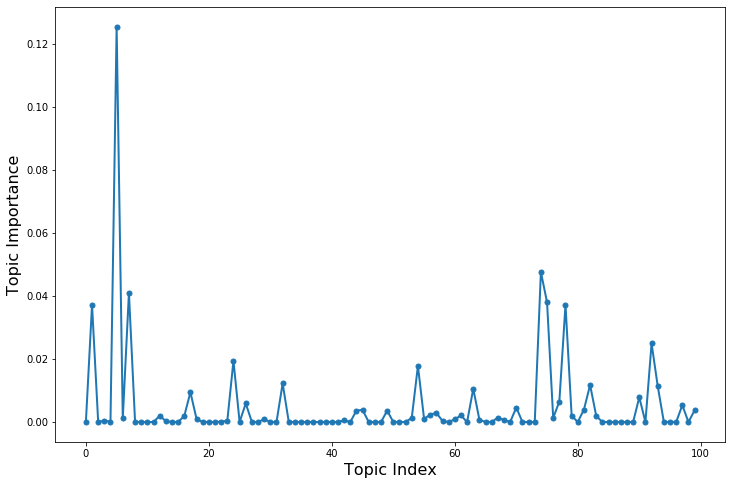

In [49]:
# Visualize topic weights for a document:
fig=plt.figure(figsize=[12,8])
index=100000
plt.plot(topic_weights[index],'.-',ms=10,lw=2)
plt.xlabel('Topic Index',fontsize=16)
plt.ylabel('Topic Importance',fontsize=16)
plt.show()

In [50]:
# This is helper class that finds the closest documents
doc_ids=X.keys()

from sklearn.metrics.pairwise import cosine_distances
class doc_neighbors():
    def __init__(self,latent_representation):
        # self.tree = KDTree(latent_representation,metric='l1')
        self.data = latent_representation

    def get_neighbor_indices(self,s,k=5):
        distances=cosine_distances(s,self.data)
        ind=np.argpartition(distances[0],k+1)
        return ind[1:k+1].reshape(-1,k)


    def get_similar_documents(self, index=4523,num_neighbors=5):
        s = self.data[index]
        # dist, ind = self.tree.query(s.reshape(1,-1), k=num_neighbors)
        ind=self.get_neighbor_indices(s.reshape(1,-1), k=num_neighbors)
        my_title=titles[doc_ids[index]]
        print("The most similar manuscripts to ``{}'' are:".format(my_title))
        for i in range(num_neighbors):
            i_title=titles[ind[0,i]]
            print("{}: ``{}''".format(i,i_title))
        return ind
    

In [51]:
my_helper=doc_neighbors(topic_weights)

In [52]:
index=48557
sim_indices=my_helper.get_similar_documents(index)

The most similar manuscripts to ``deepMINE - Natural Language Processing based Automatic Literature Mining and Research Summarization for Early-Stage Comprehension in Pandemic Situations specifically for COVID-19'' are:
0: ``Single-Incision Laparoscopic Cholecystectomy: our experience and review of literature.''
1: ``Trichomonas''
2: ``High SARS-CoV-2 Antibody Prevalence among Healthcare Workers Exposed to COVID-19 Patients''
3: ``Cross-Protection by Infectious Bronchitis Viruses Under Controlled Experimental Conditions.''
4: ``Position paper on the preparation of immune plasma to be used in the treatment of patients with COVID-19''


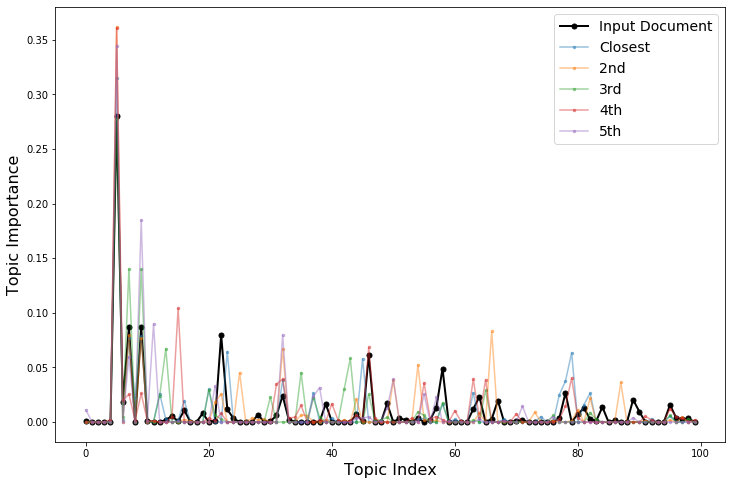

In [18]:
# Visualize topic weights for a document and its top-5 most similar:
fig=plt.figure(figsize=[12,8])
plt.plot(topic_weights[index]/np.sum(topic_weights[index]),'k.-',ms=10,lw=2)
for i in range(0,5):
    plt.plot(topic_weights[sim_indices[0,i]]/np.sum(topic_weights[sim_indices[0,i]]),'.-',alpha=.45,ms=5,lw=1.5)
plt.xlabel('Topic Index',fontsize=16)
plt.ylabel('Topic Importance',fontsize=16)
plt.legend(['Input Document','Closest','2nd','3rd','4th','5th'],fontsize=14)
plt.show()
fig.savefig('find_neighbors.pdf',transparent=True,bbox_inches="tight")

### Learn a 2-d representation of document similarity
This section performs and visualizes a t-distributed Stochastic Neighbor Embedding.

In [25]:
# This algorithm is slow, so we use a subset of data for convienence
X_subset=X[X.keys()[np.arange(0,X.shape[0],25)]]

In [20]:
from sklearn.manifold import TSNE
latent_subset=nmf.transform(tfidf_vectorizer.transform(X_subset))
paired_distances=cosine_distances(latent_subset,latent_subset)
tsne=TSNE(n_components=2,n_iter=30000,metric='precomputed')
S=tsne.fit_transform(paired_distances)

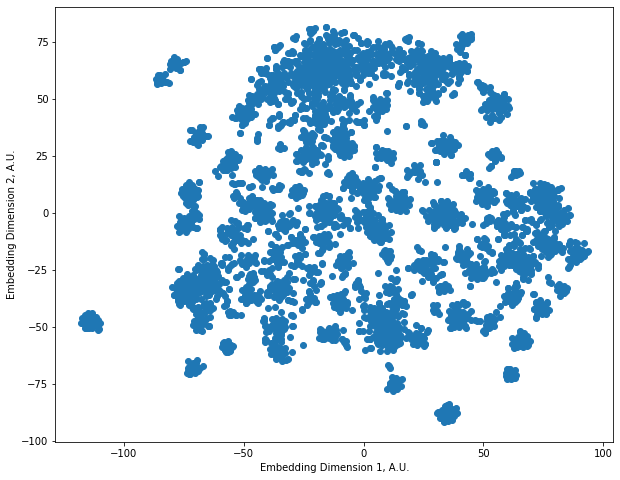

In [21]:
fig=plt.figure(figsize=[10,8])
ax = plt.subplot(111)
plt.scatter(S[:, 0], S[:, 1])
plt.xlabel('Embedding Dimension 1, A.U.')
plt.ylabel('Embedding Dimension 2, A.U.')
plt.show()
fig.savefig('tsne.pdf',transparent=True,bbox_inches="tight")

### Ending Notes
This notebook only uses word counting based methods.  There are significant recent advances that have been achieved by using word embeddings and deep learning techniques.  For those that want to learn more, consider the code base and Coursera course mentioned in the introduction to this notebook.